In [5]:
import os
import numpy as np
import evaluation as ev

In [3]:
#load data
large_data = np.loadtxt(os.path.join(r'..\data', 'reduced_data_20_PCs.csv'), delimiter=',')
print(large_data.shape)

d_path = './'
membership_arr_louvain = np.load(os.path.join(d_path,'membership_arr_louvain_large_k5_t10000_knn.npy'))

membership_arr_gmm = np.load(os.path.join(d_path,'membership_arr_gmm_23.npy'))

(16155, 20)


In [6]:
louvain_centres = ev.calculate_cluster_centroids(membership_arr_louvain, large_data)
louvain_di = ev.dunn_index(membership_arr_louvain, large_data, louvain_centres)
louvain_sc = ev.silhouette_coefficient(membership_arr_louvain, large_data, louvain_centres)

gmm_centres = ev.calculate_cluster_centroids(membership_arr_gmm, large_data)
gmm_di = ev.dunn_index(membership_arr_gmm, large_data, gmm_centres)
gmm_sc = ev.silhouette_coefficient(membership_arr_gmm, large_data, gmm_centres)

di = np.asarray([louvain_di, gmm_di])
sc = [louvain_sc, gmm_sc]


TypeError: plot_evaluation_metric() missing 1 required positional argument: 'cluster_method'

FileNotFoundError: [Errno 2] No such file or directory: './output\\Dunn Index_Cluster Method.png'

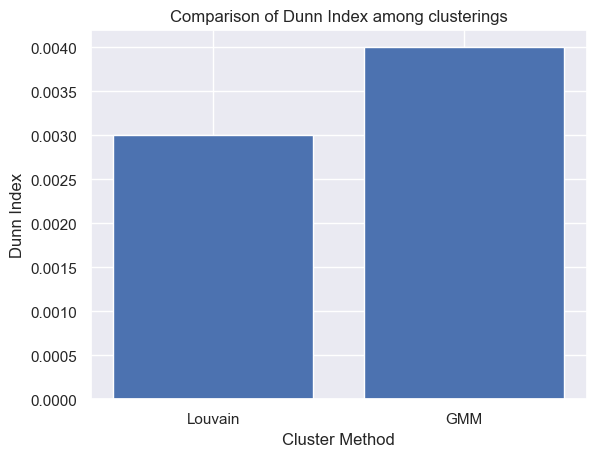

In [7]:

ev.plot_evaluation_metric(di, ['Louvain','GMM'], "Dunn Index", 'Cluster Method', output_folder = '../output')
ev.plot_evaluation_metric(
        sc, ['Louvain', 'GMM'], "Silhouette Coefficient", 'Cluster Method',  output_folder = '../output')